# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:'Times New Roman'; background-color:#FF6347; overflow:hidden"><b>Import libraries and load data</b></div>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score




df=pd.read_csv("/kaggle/input/exercise-detection-dataset/exercise_angles.csv")
print(df.info())
print(df.isnull().sum())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31033 entries, 0 to 31032
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Side                   31033 non-null  object 
 1   Shoulder_Angle         31033 non-null  float64
 2   Elbow_Angle            31033 non-null  float64
 3   Hip_Angle              31033 non-null  float64
 4   Knee_Angle             31033 non-null  float64
 5   Ankle_Angle            31033 non-null  float64
 6   Shoulder_Ground_Angle  31033 non-null  float64
 7   Elbow_Ground_Angle     31033 non-null  float64
 8   Hip_Ground_Angle       31033 non-null  float64
 9   Knee_Ground_Angle      31033 non-null  float64
 10  Ankle_Ground_Angle     31033 non-null  float64
 11  Label                  31033 non-null  object 
dtypes: float64(10), object(2)
memory usage: 2.8+ MB
None
Side                     0
Shoulder_Angle           0
Elbow_Angle              0
Hip_Angle               

# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:'Times New Roman'; background-color:#FF6347; overflow:hidden"><b>EDA</b></div>




In [2]:
print(df.describe())

       Shoulder_Angle   Elbow_Angle     Hip_Angle    Knee_Angle   Ankle_Angle  \
count    31033.000000  31033.000000  31033.000000  31033.000000  31033.000000   
mean        66.522206    114.303010    137.466151    143.273623    135.211957   
std         60.226756     57.906279     57.048278     48.041715     53.304068   
min          0.002748      0.000974      0.006850      0.116036      0.031297   
25%         17.852184     58.900491    111.556724    123.646144    106.740814   
50%         40.585632    132.999090    168.374922    168.227063    162.926184   
75%        121.209005    168.769517    175.656498    177.225089    175.735039   
max        179.991577    179.998861    179.999848    179.999277    179.999942   

       Shoulder_Ground_Angle  Elbow_Ground_Angle  Hip_Ground_Angle  \
count           31033.000000        31033.000000      31033.000000   
mean               88.816743           88.926949         79.408694   
std                14.546233           13.856550         42.

# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:'Times New Roman'; background-color:#FF6347; overflow:hidden"><b>Univariate Analysis</b></div>


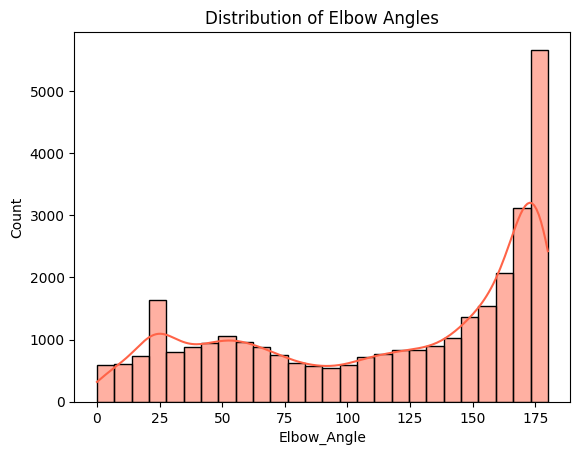

In [3]:
sns.histplot(data=df, x='Elbow_Angle', kde=True, color='#FF6347')  
plt.title('Distribution of Elbow Angles')
plt.show()

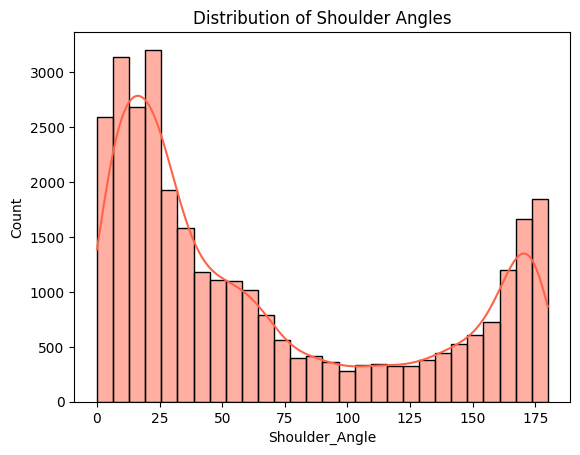

In [4]:
sns.histplot(data=df, x='Shoulder_Angle', kde=True,color='#FF6347')
plt.title('Distribution of Shoulder Angles')
plt.show()


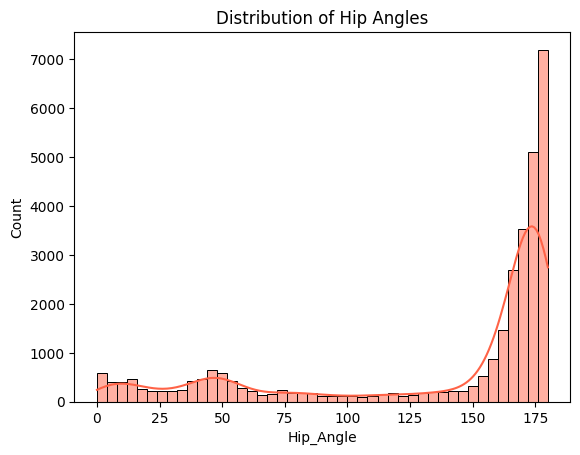

In [5]:
sns.histplot(data=df, x='Hip_Angle', kde=True,color='#FF6347')
plt.title('Distribution of Hip Angles')
plt.show()


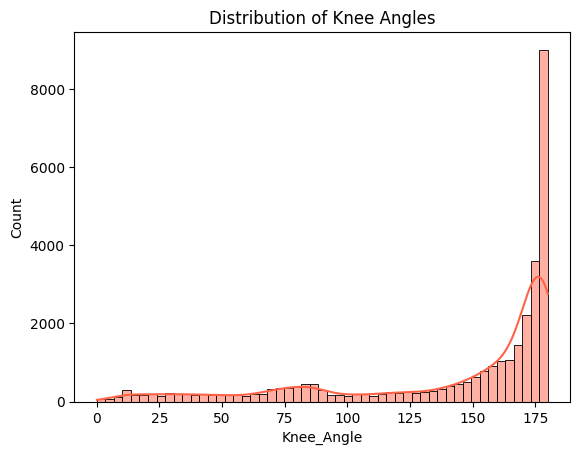

In [6]:
sns.histplot(data=df, x='Knee_Angle', kde=True,color='#FF6347')
plt.title('Distribution of Knee Angles')
plt.show()


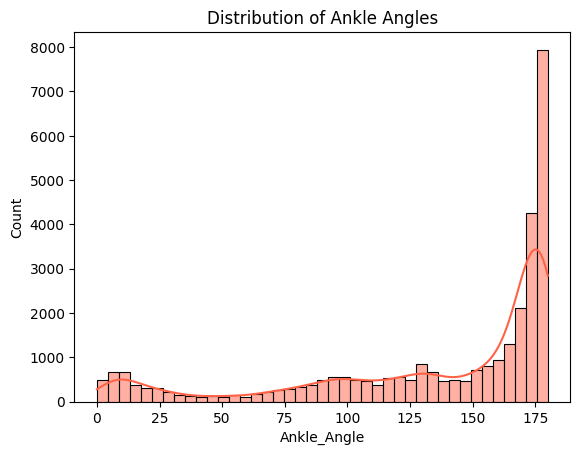

In [7]:
sns.histplot(data=df, x='Ankle_Angle', kde=True,color='#FF6347')
plt.title('Distribution of Ankle Angles')
plt.show()


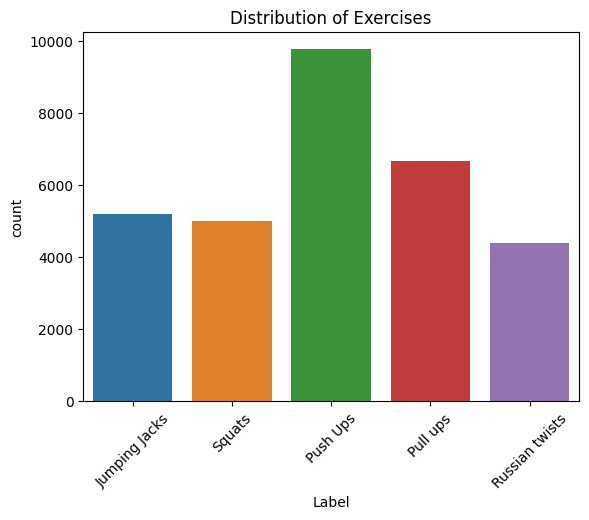

In [8]:
sns.countplot(data=df, x='Label')
plt.title('Distribution of Exercises')
plt.xticks(rotation=45)
plt.show()


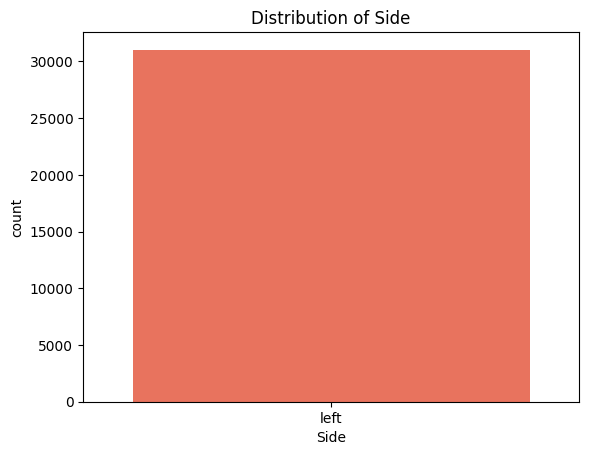

In [9]:
sns.countplot(data=df, x='Side',color='#FF6347')
plt.title('Distribution of Side')
plt.show()


# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:'Times New Roman'; background-color:#FF6347; overflow:hidden"><b>Bivariate Analysis</b></div>

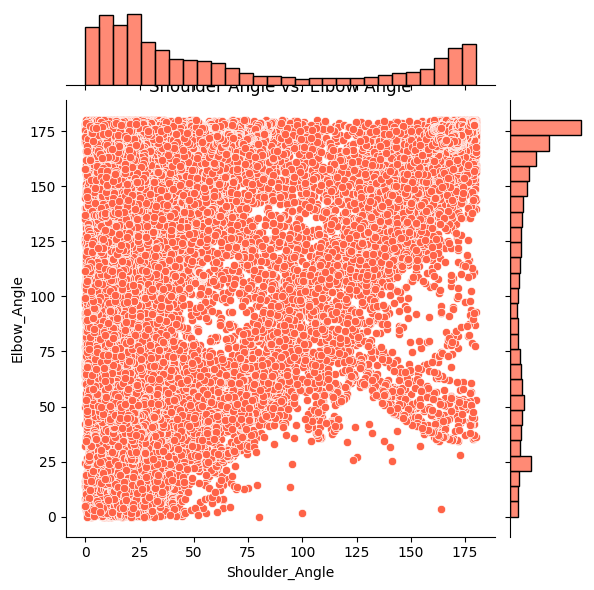

In [10]:
sns.jointplot(data=df, x='Shoulder_Angle', y='Elbow_Angle', kind='scatter',color='#FF6347')
plt.title('Shoulder Angle vs. Elbow Angle')
plt.show()


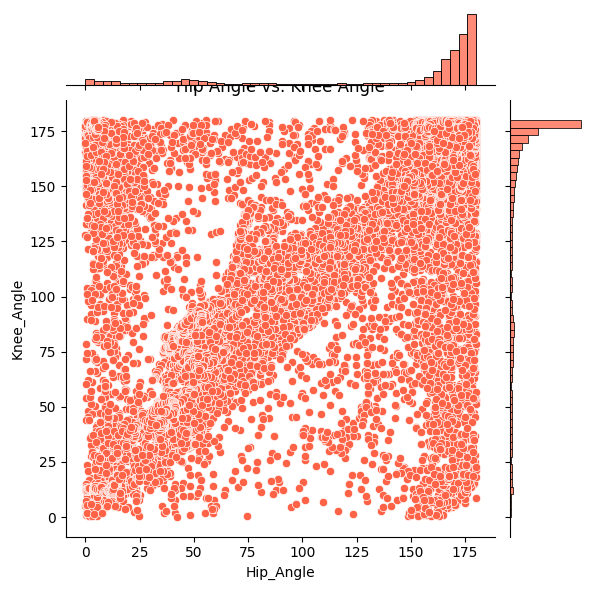

In [11]:
sns.jointplot(data=df, x='Hip_Angle', y='Knee_Angle', kind='scatter',color='#FF6347')
plt.title('Hip Angle vs. Knee Angle')
plt.show()


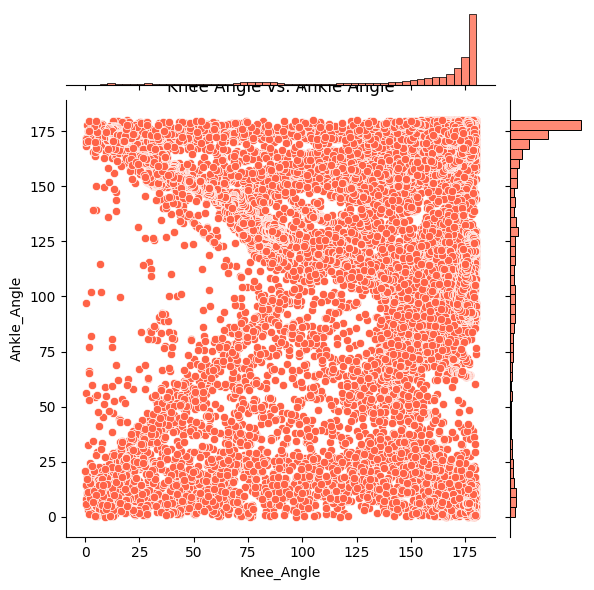

In [12]:
sns.jointplot(data=df, x='Knee_Angle', y='Ankle_Angle', kind='scatter',color='#FF6347')
plt.title('Knee Angle vs. Ankle Angle')
plt.show()


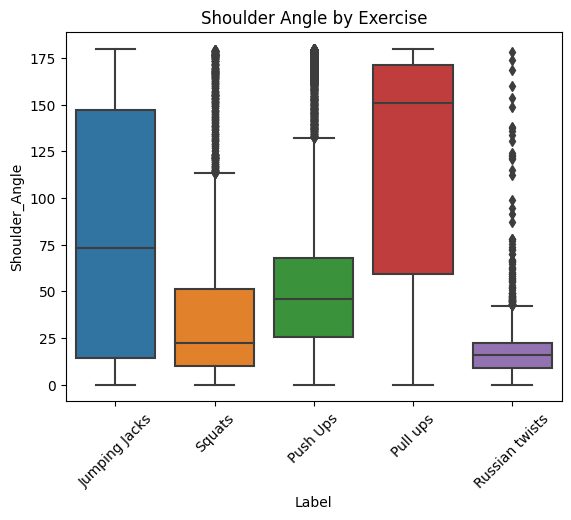

In [13]:
sns.boxplot(data=df, x='Label', y='Shoulder_Angle')
plt.title('Shoulder Angle by Exercise')
plt.xticks(rotation=45)
plt.show()


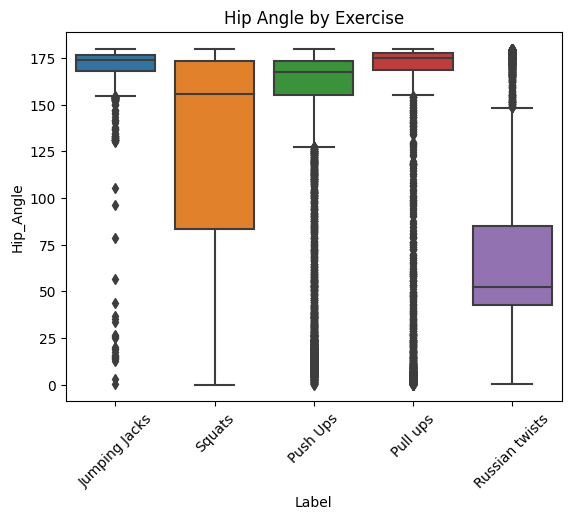

In [14]:
sns.boxplot(data=df, x='Label', y='Hip_Angle')
plt.title('Hip Angle by Exercise')
plt.xticks(rotation=45)
plt.show()


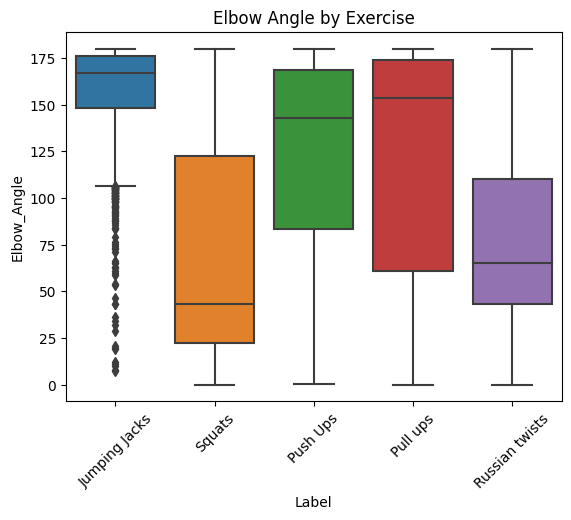

In [15]:
sns.boxplot(data=df, x='Label', y='Elbow_Angle')
plt.title('Elbow Angle by Exercise')
plt.xticks(rotation=45)
plt.show()


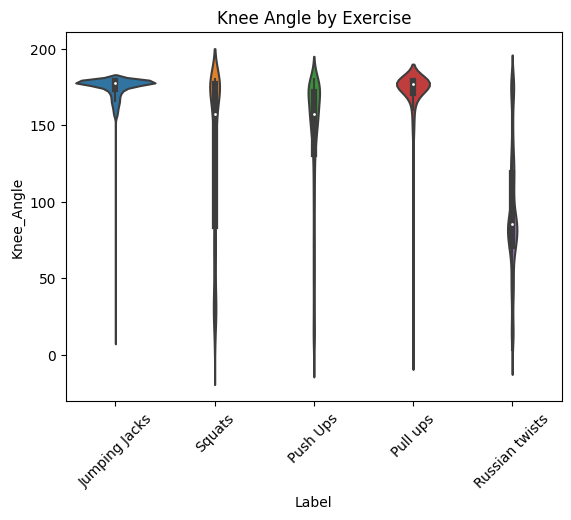

In [16]:
sns.violinplot(data=df, x='Label', y='Knee_Angle')
plt.title('Knee Angle by Exercise')
plt.xticks(rotation=45)
plt.show()


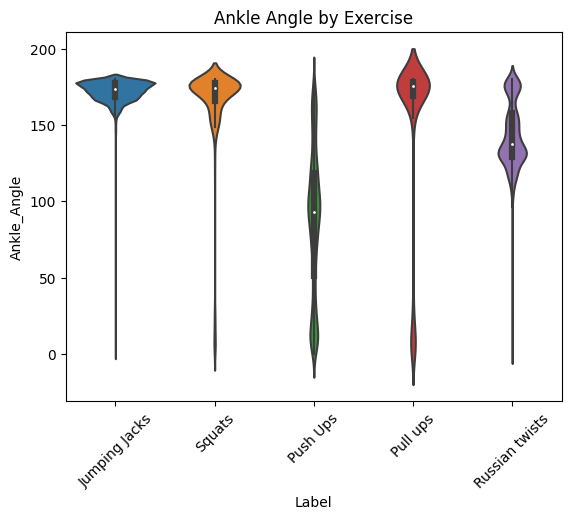

In [17]:
sns.violinplot(data=df, x='Label', y='Ankle_Angle')
plt.title('Ankle Angle by Exercise')
plt.xticks(rotation=45)
plt.show()


# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:'Times New Roman'; background-color:#FF6347; overflow:hidden"><b>Multivariate Analysis</b></div>


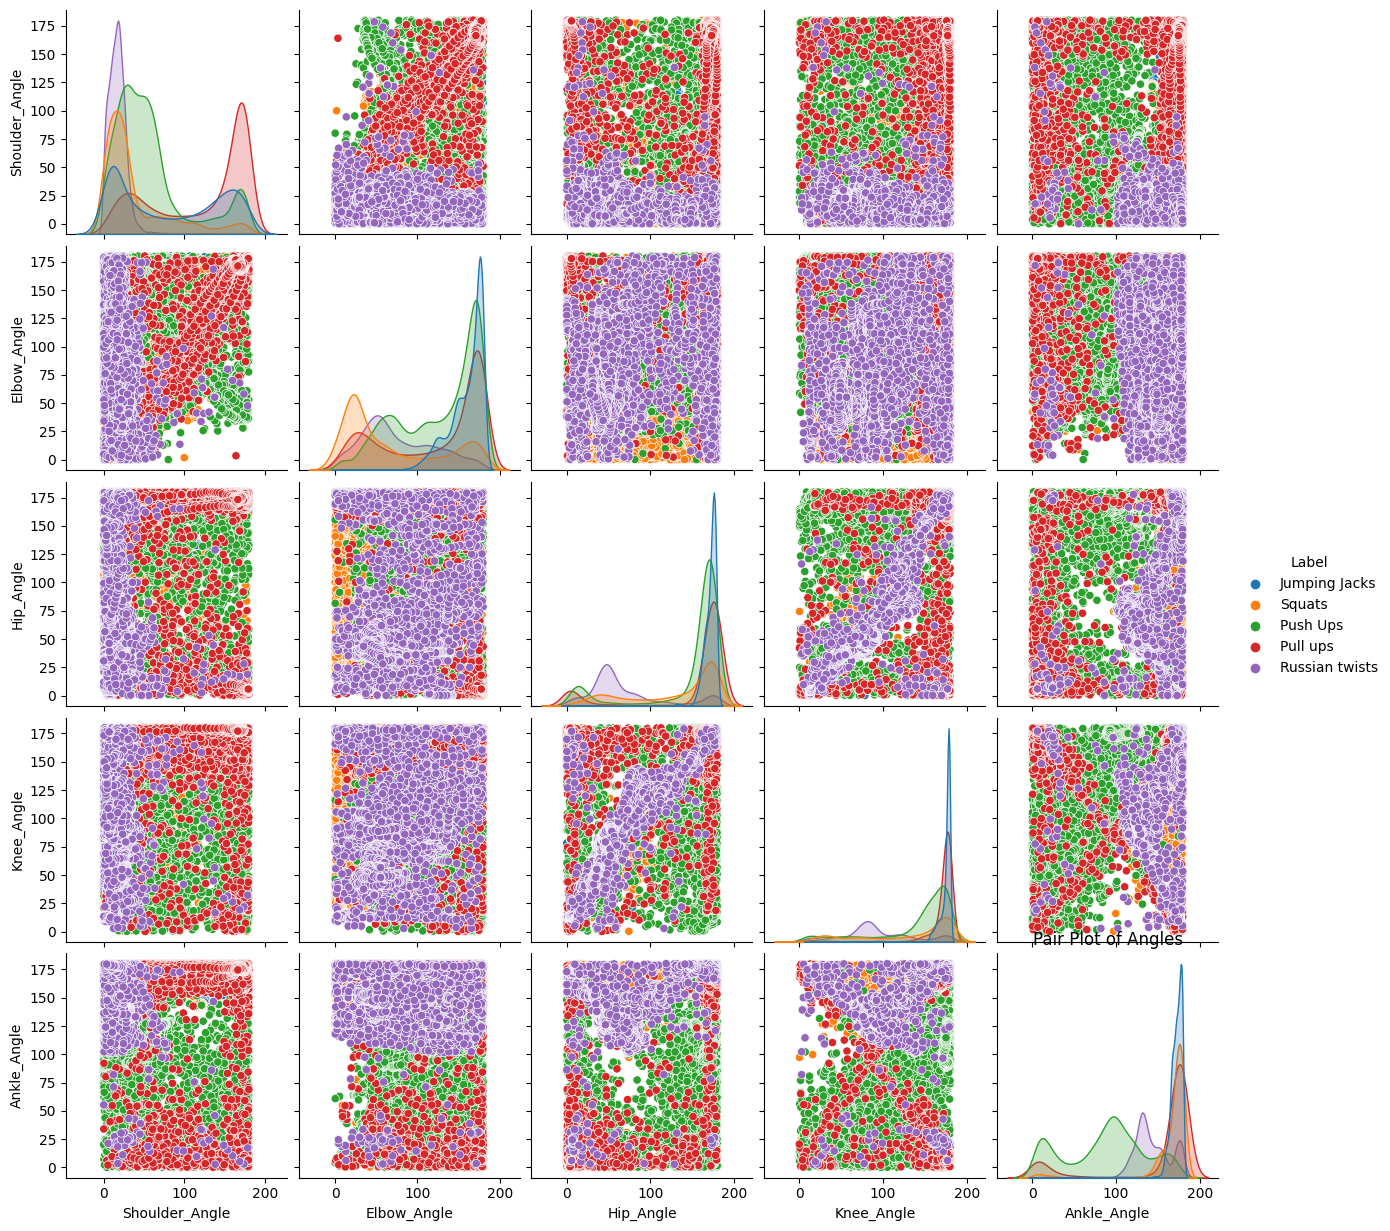

In [18]:
sns.pairplot(data=df, vars=['Shoulder_Angle', 'Elbow_Angle', 'Hip_Angle', 'Knee_Angle', 'Ankle_Angle'], hue='Label')
plt.title('Pair Plot of Angles')
plt.show()


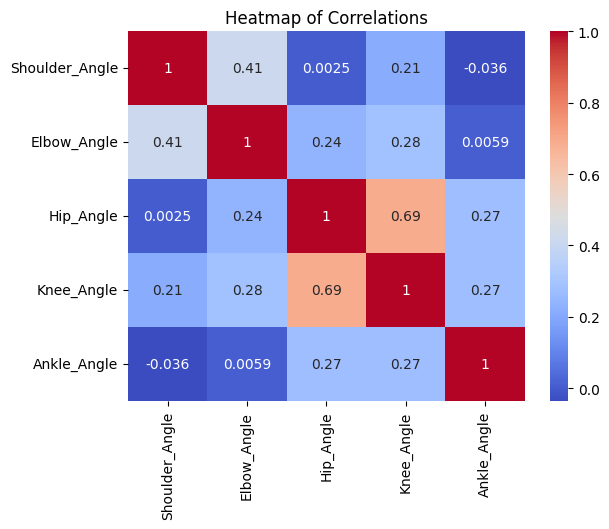

In [19]:
corr = df[['Shoulder_Angle', 'Elbow_Angle', 'Hip_Angle', 'Knee_Angle', 'Ankle_Angle']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()


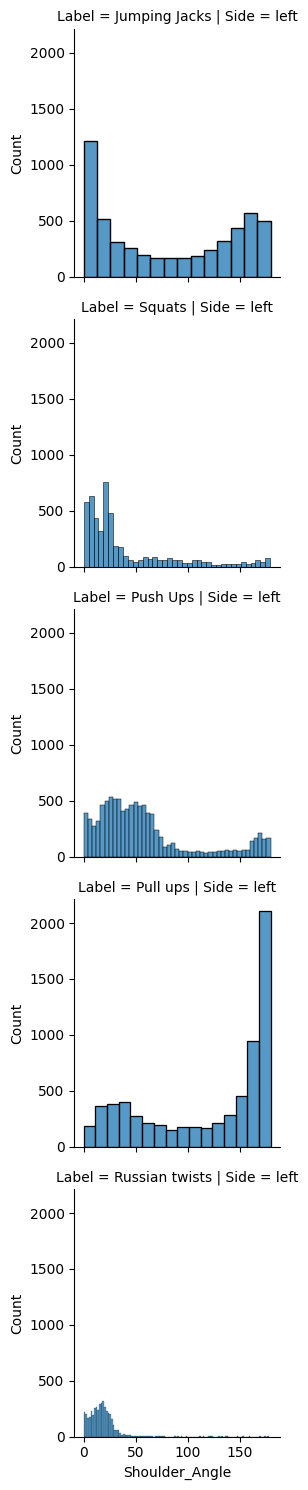

In [20]:
g = sns.FacetGrid(df, col='Side', row='Label')
g.map(sns.histplot, 'Shoulder_Angle')
plt.show()


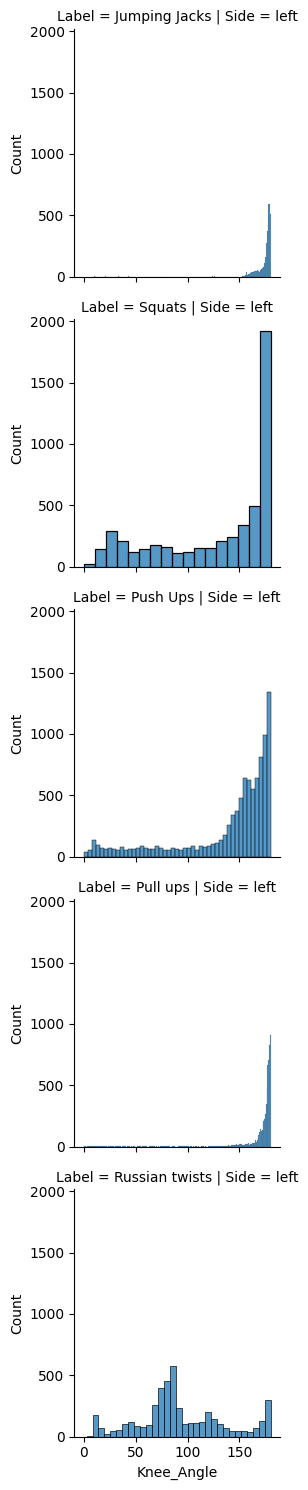

In [21]:
g = sns.FacetGrid(df, col='Side', row='Label')
g.map(sns.histplot, 'Knee_Angle')
plt.show()


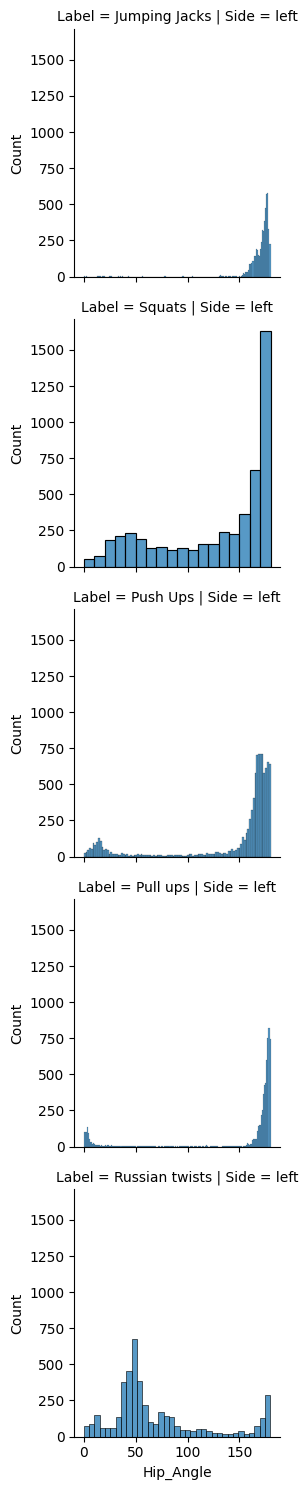

In [22]:
g = sns.FacetGrid(df, col='Side', row='Label')
g.map(sns.histplot, 'Hip_Angle')
plt.show()


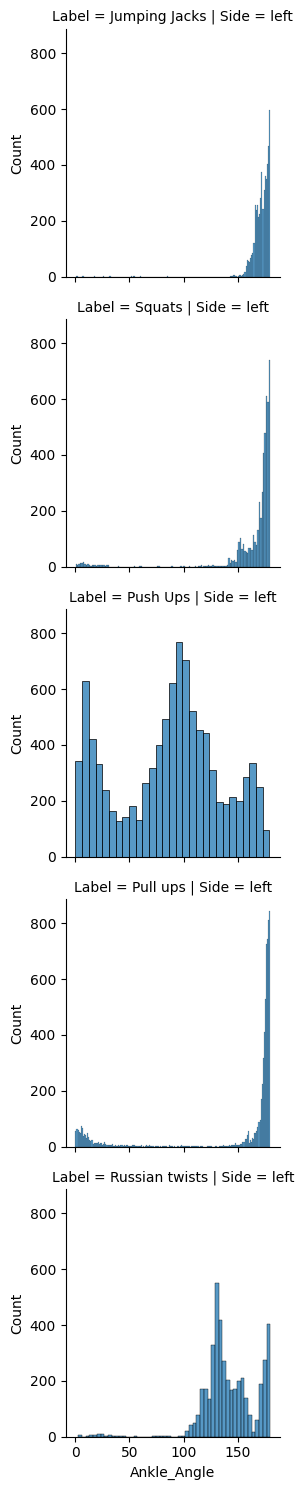

In [23]:
g = sns.FacetGrid(df, col='Side', row='Label')
g.map(sns.histplot, 'Ankle_Angle')
plt.show()


# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:'Times New Roman'; background-color:#FF6347; overflow:hidden"><b>Model</b></div>


In [24]:
df_encoded = pd.get_dummies(df, columns=['Side'], drop_first=True)
label_encoder = LabelEncoder()
df_encoded['Label'] = label_encoder.fit_transform(df_encoded['Label'])
X = df_encoded.drop('Label', axis=1)
y = df_encoded['Label']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 997   28    6    1   10]
 [  10 1275   33    3   11]
 [   4    0 1942    1    6]
 [   0    3   13  846   19]
 [  17   33   23    8  918]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1042
           1       0.95      0.96      0.95      1332
           2       0.96      0.99      0.98      1953
           3       0.98      0.96      0.97       881
           4       0.95      0.92      0.94       999

    accuracy                           0.96      6207
   macro avg       0.96      0.96      0.96      6207
weighted avg       0.96      0.96      0.96      6207



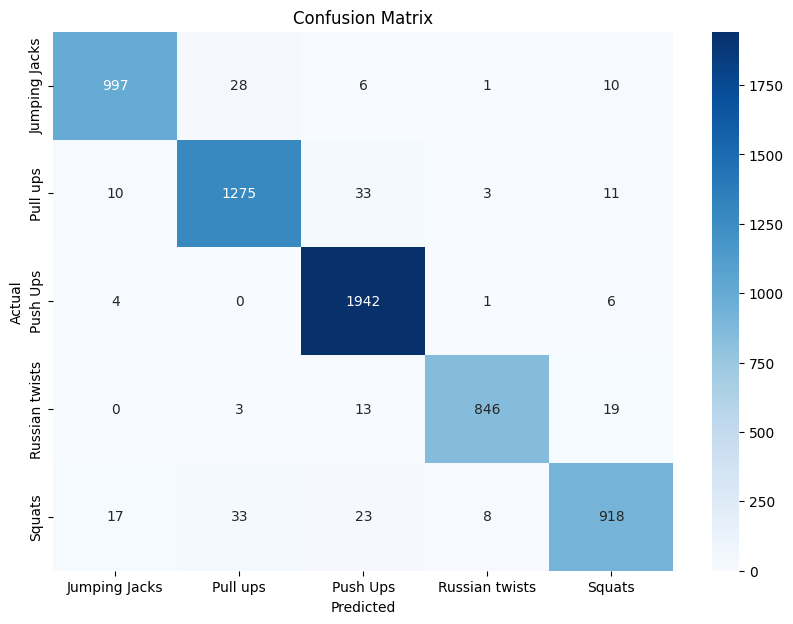

In [25]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


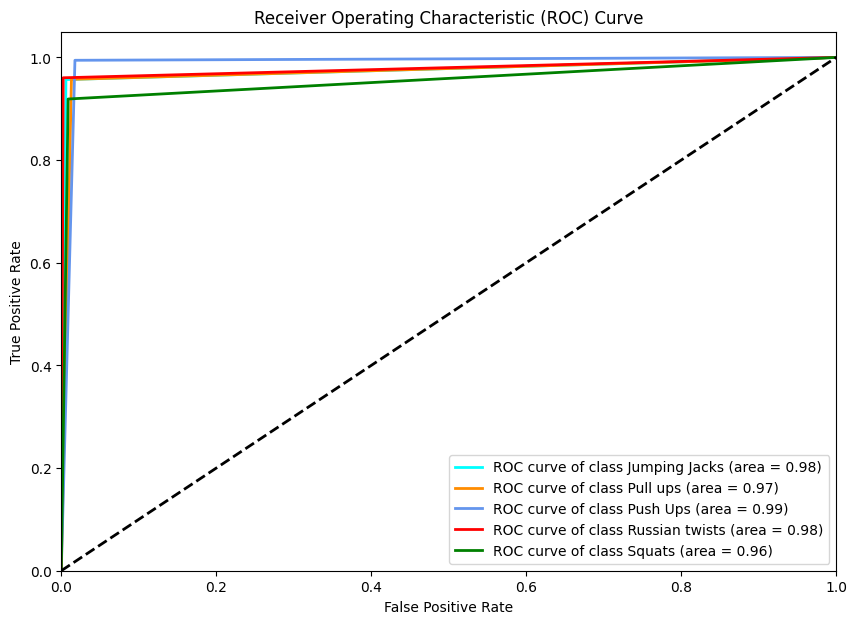

In [26]:
y_test_bin = label_binarize(y_test, classes=range(len(label_encoder.classes_)))
y_pred_bin = label_binarize(y_pred, classes=range(len(label_encoder.classes_)))

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(10, 7))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown', 'pink', 'gray', 'olive'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(label_encoder.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


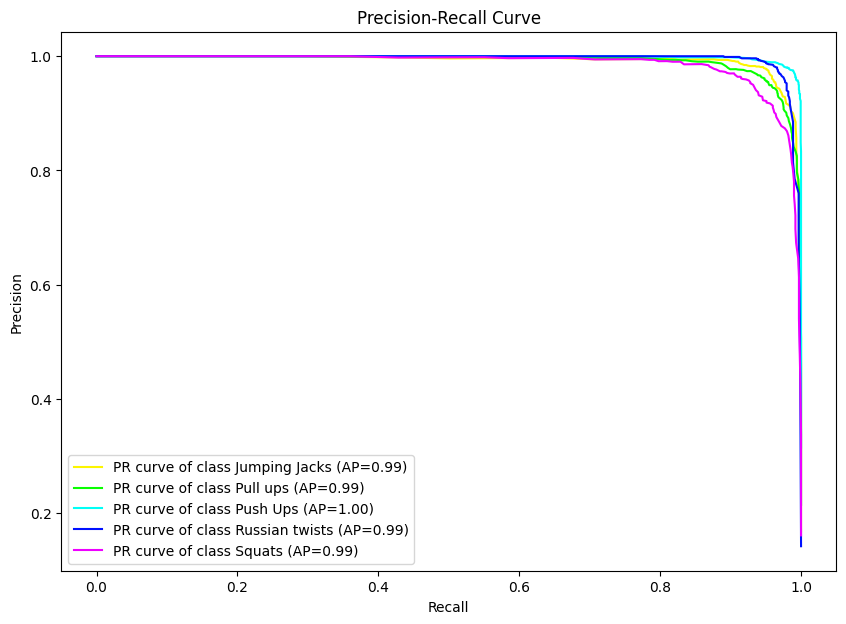

In [27]:
y_test_bin = label_binarize(y_test, classes=range(len(label_encoder.classes_)))
n_classes = y_test_bin.shape[1]

precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], clf.predict_proba(X_test)[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], clf.predict_proba(X_test)[:, i])


plt.figure(figsize=(10, 7))
colors = sns.color_palette("hsv", n_classes)

for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color,
             label=f'PR curve of class {label_encoder.classes_[i]} (AP={average_precision[i]:0.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()


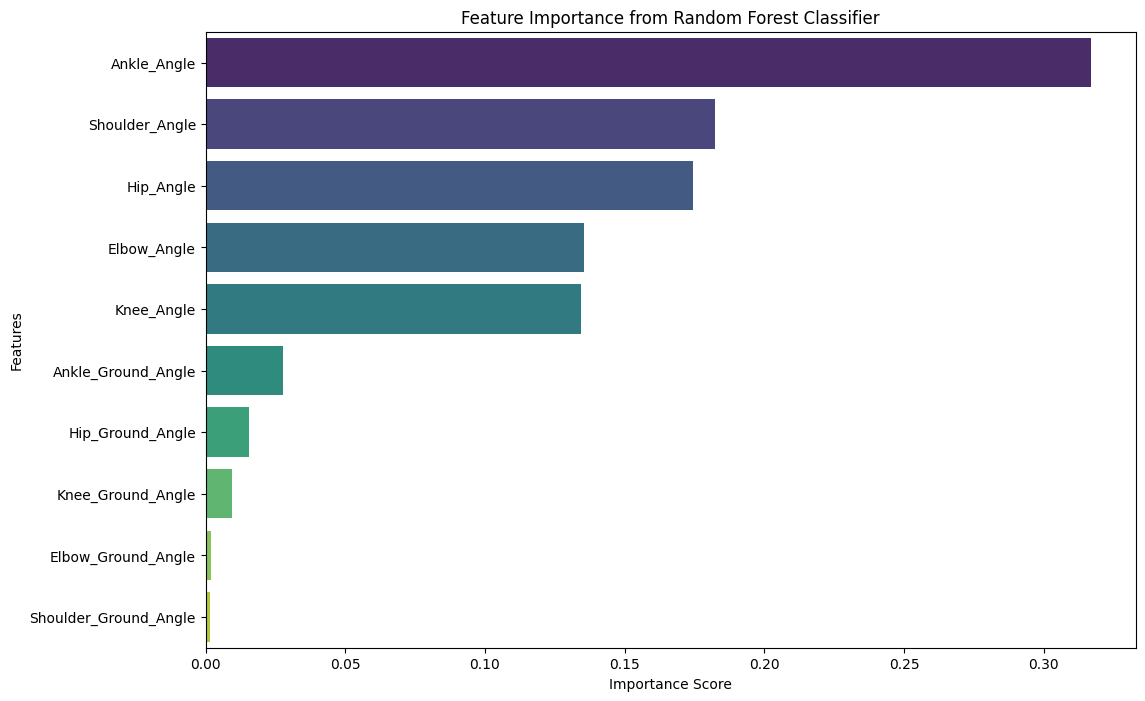

In [28]:
importances = clf.feature_importances_
feature_names = X.columns 
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


<p style="font-size:250%; font-weight:bold; color:black; text-align:center; margin-top:10px;">If you like my notebook, please upvote!</p>